In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
data = data.drop(['id', 'ever_married', 'Residence_type'], axis =1)
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Self-employed,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Private,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Private,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Self-employed,174.12,24.000000,never smoked,1


In [7]:
#data.dropna(inplace = True)
data.shape

(5110, 9)

In [8]:
data = data.replace(to_replace = 'Male', value = 1)
data = data.replace(to_replace = 'Female', value = 0)

In [9]:
data = data.replace(to_replace = 'Other',value = 1)
data.gender.value_counts()

0    2994
1    2116
Name: gender, dtype: int64

In [10]:
data["work_type"] = data["work_type"].astype("category")
data["work_type"] = data["work_type"].cat.codes
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,3,202.21,28.893237,never smoked,1
2,1,80.0,0,1,2,105.92,32.500000,never smoked,1
3,0,49.0,0,0,2,171.23,34.400000,smokes,1
4,0,79.0,1,0,3,174.12,24.000000,never smoked,1


In [11]:
data["smoking_status"] = data["smoking_status"].astype("category")
data["smoking_status"] = data["smoking_status"].cat.codes
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,228.69,36.600000,1,1
1,0,61.0,0,0,3,202.21,28.893237,2,1
2,1,80.0,0,1,2,105.92,32.500000,2,1
3,0,49.0,0,0,2,171.23,34.400000,3,1
4,0,79.0,1,0,3,174.12,24.000000,2,1


In [12]:
x = data.iloc[:, 0:-1]

In [13]:
y = data.iloc[:, -1]

In [14]:
x.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,2,228.69,36.600000,1
1,0,61.0,0,0,3,202.21,28.893237,2
2,1,80.0,0,1,2,105.92,32.500000,2
3,0,49.0,0,0,2,171.23,34.400000,3
4,0,79.0,1,0,3,174.12,24.000000,2


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   int8   
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   int8   
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(2)
memory usage: 289.6 KB


In [17]:
#x = pd.get_dummies(x)

In [18]:
x.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
work_type            False
avg_glucose_level    False
bmi                  False
smoking_status       False
dtype: bool

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
train_x, test_x, train_y, test_y =train_test_split(x,y, test_size = 0.2, random_state =0, shuffle = True)

In [22]:
train_x.shape, train_y.shape, test_x.shape

((4088, 8), (4088,), (1022, 8))

In [23]:
LR = LogisticRegression()

In [24]:
LR.fit(train_x, train_y)

C:\Users\arrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = LR.predict(test_x)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, recall_score, precision_score

In [27]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(confusion_matrix(test_y, y_pred))

[[968   0]
 [ 54   0]]


In [39]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [48]:
!pip install delayed

In [29]:
import imblearn

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE()

In [33]:
x_after_smote, y_after_smote = smote.fit_resample(x, y)

In [37]:
train_x, test_x, train_y, test_y = train_test_split(x_after_smote, y_after_smote, test_size = 0.2, random_state = 10, shuffle = True)

In [39]:
y_after_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [36]:
LogReg = LogisticRegression()

In [40]:
LogReg.fit(train_x, train_y)

C:\Users\arrah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
log_pred = LogReg.predict(test_x)

In [42]:
print(classification_report(log_pred, test_y))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       958
           1       0.80      0.76      0.78       987

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



In [46]:
confusion_matrix(log_pred, test_y)

array([[766, 192],
       [232, 755]], dtype=int64)

In [47]:
from sklearn.model_selection import cross_validate

In [49]:
cv = cross_validate(LogReg,x,y,cv=5,n_jobs=-1,verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [50]:
cv['test_score']

array([0.95107632, 0.95107632, 0.95107632, 0.95009785, 0.95205479])

In [51]:
from statistics import mean

In [52]:
mean(cv['test_score'])

0.9510763209393346

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
LR_ada = AdaBoostClassifier(base_estimator = LogReg, n_estimators =10)

In [58]:
LR_ada.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10)

In [59]:
lr_ada_pred = LR_ada.predict(test_x)

In [60]:
print(classification_report(lr_ada_pred, test_y))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       932
           1       0.81      0.76      0.78      1013

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



RANDOM FOREST

In [61]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [62]:
RandForest = RandomForestClassifier()

In [63]:
RandForest.fit(train_x, train_y)

RandomForestClassifier()

In [64]:
RF_pred = RandForest.predict(test_x)

In [65]:
print(classification_report(test_y, RF_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       998
           1       0.92      0.95      0.93       947

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid_rf = {"n_estimators" : [25,50,75], "max_depth" : [20,30,40], "criterion" : ["gini", "entropy"]}
gridsearch_for_random_forest = GridSearchCV(estimator = RandForest, param_grid = param_grid_rf, n_jobs = -1, verbose = 3)

In [68]:
gridsearch_for_random_forest.fit(train_x, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'n_estimators': [25, 50, 75]},
             verbose=3)

In [69]:
rf_grid_pred = gridsearch_for_random_forest.predict(test_x)

In [70]:
gridsearch_for_random_forest.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=50)

In [71]:
gridsearch_for_random_forest.best_score_

0.9341664255779929

In [72]:
print(classification_report(rf_grid_pred, test_y))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       970
           1       0.94      0.91      0.93       975

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



In [40]:
param_grid_rf2 = {"n_estimators" : [65, 70, 75],
                  "max_depth" : [35, 40, 45],
                  "min_samples_split":[5,10,20,25],
                  "min_samples_leaf":[2,6,8,10],
                  "criterion" : ["gini", "entropy"]}

In [41]:
gridsearch_for_random_forest2 = GridSearchCV(estimator = RandForest, param_grid = param_grid_rf2, n_jobs = -1, verbose = 3)

In [42]:
gridsearch_for_random_forest2.fit(train_x, train_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.3min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [35, 40, 45],
                         'min_samples_leaf': [2, 6, 8, 10],
                         'min_samples_split': [5, 10, 20, 25],
                         'n_estimators': [65, 70, 75]},
             verbose=3)

In [43]:
rf_gridsearchcv_pred = gridsearch_for_random_forest2.predict(test_x)

In [44]:
gridsearch_for_random_forest2.best_estimator_

RandomForestClassifier(max_depth=35, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=65)

In [45]:
print(classification_report(rf_gridsearchcv_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
gridsearch_for_random_forest2.best_score_

0.9572194940114424

In [47]:
param_grid_rf2 = {"n_estimators" : [65, 70],
                  "max_depth" : [35, 40],
                  "min_samples_split":[4, 5, 6],
                  "min_samples_leaf":[2, 3],
                  "criterion" : ["gini", "entropy"]}

In [48]:
gridsearch_for_rf3 = GridSearchCV(estimator = RandForest, param_grid = param_grid_rf2, n_jobs =5, verbose =3, cv=5)

In [49]:
gridsearch_for_rf3.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   33.5s
[Parallel(n_jobs=5)]: Done 240 out of 240 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [35, 40], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [65, 70]},
             verbose=3)

In [50]:
rf3_pred = gridsearch_for_rf3.predict(test_x)

In [51]:
gridsearch_for_rf3.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=70)

In [52]:
gridsearch_for_rf3.best_score_

0.9572198181552973

In [53]:
print(classification_report(rf3_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SUPPORT VECTOR

In [54]:
#SVM method
from sklearn.svm import SVC

In [55]:
svc_model2 = SVC()

In [56]:
param_grid_svc = {"kernel" : ["sigmoid", "linear", "rbf"], "C" : [0.01, 0.1, 1, 10]}

In [57]:
GSV_svc = GridSearchCV(estimator = svc_model2, param_grid = param_grid_svc, cv=5, n_jobs =-1, verbose =3)

In [58]:
GSV_svc.fit(train_x, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.5min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['sigmoid', 'linear', 'rbf']},
             verbose=3)

In [59]:
svc_y_pred = GSV_svc.predict(test_x)

In [60]:
GSV_svc.best_estimator_

SVC(C=0.01, kernel='sigmoid')

In [61]:
GSV_svc.best_score_

0.9569647169413786

In [62]:
print(classification_report(svc_y_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.model_selection import GridSearchCV

In [262]:
param_grid = {"criterion" : ["entropy"],
              "max_depth" : [5, 10],
              "min_samples_leaf" : [10, 20],
              "n_estimators" : [25, 50]}

In [263]:
GSV = GridSearchCV(RandForest, param_grid = param_grid, cv= 5, n_jobs = -1, verbose =3)

In [264]:
GSV.fit(train_x, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [25, 50]},
             verbose=3)

In [67]:
GSV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=2,
                       min_samples_leaf=10, n_estimators=25)

In [68]:
GSV.best_score_

0.9569647169413786

In [69]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [70]:
dec_tree = DecisionTreeClassifier()

In [71]:
dec_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [72]:
dec_tree_pred = dec_tree.predict(test_x)

In [73]:
print(classification_report(test_y, dec_tree_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       942
           1       0.07      0.10      0.09        40

    accuracy                           0.91       982
   macro avg       0.52      0.52      0.52       982
weighted avg       0.93      0.91      0.92       982



In [74]:
print(confusion_matrix(dec_tree_pred, test_y))

[[892  36]
 [ 50   4]]


In [75]:
param_grid = {"criterion":['gini',"entropy"],
             "max_depth":[8,10,12,16],
             "min_samples_split":[50,100,150],
             "min_samples_leaf":[20,30,40]}

In [76]:
GSV_dec = GridSearchCV(estimator = dec_tree, param_grid = param_grid, cv = 5, verbose =3, n_jobs = -1)

In [77]:
GSV_dec.fit(train_x, train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 16],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [50, 100, 150]},
             verbose=3)

In [78]:
dec_tree_gsv_y_pred = GSV_dec.predict(test_x)

In [79]:
GSV_dec.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=50)

In [80]:
GSV_dec.best_score_

0.9569647169413786

In [81]:
param_grid = {"criterion":['gini', "entropy"],
             "max_depth":[2, 4, 6, 8],
             "min_samples_split":[35, 40, 45],
             "min_samples_leaf":[5, 10, 15]}

In [82]:
GSV2_dec = GridSearchCV(estimator = dec_tree, param_grid= param_grid, cv= 5, verbose = 3, n_jobs= 4)

In [83]:
GSV2_dec.fit(train_x, train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:    9.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [35, 40, 45]},
             verbose=3)

In [84]:
GSV2_dec_tree_pred = GSV2_dec.predict(test_x)

In [85]:
GSV2_dec.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=35)

In [86]:
GSV2_dec.best_score_

0.9569647169413786

In [87]:
print(classification_report(GSV2_dec_tree_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada = AdaBoostClassifier(base_estimator = RandForest, n_estimators =25)

In [90]:
ada.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=25)

In [91]:
adaboost_pred = ada.predict(test_x)

In [92]:
print(classification_report(test_y, adaboost_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [93]:
#KNN CLASSIFIER

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [96]:
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=9)

In [97]:
KN_y_pred = knn_model.predict(test_x)

In [98]:
print(classification_report(KN_y_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
cross_validate_1 = cross_validate(knn_model, x, y, cv=5, n_jobs = -1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [100]:
cross_validate_1["test_score"]

array([0.95519348, 0.95621181, 0.95723014, 0.95519348, 0.95718654])

In [101]:
from statistics import mean

In [102]:
mean(cross_validate_1['test_score'])

0.9562030929825545

In [103]:
from sklearn.metrics import confusion_matrix
con_matrix = print(confusion_matrix(KN_y_pred, test_y))

[[942  40]
 [  0   0]]


In [104]:
print(classification_report(KN_y_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#NAIVE BAYES

In [106]:
from sklearn.naive_bayes import BernoulliNB

In [107]:
BNB = BernoulliNB()

In [108]:
BNB.fit(train_x, train_y)

BernoulliNB()

In [109]:
BNB_pred = BNB.predict(test_x)

In [110]:
print(classification_report(BNB_pred, test_y))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       969
           1       0.07      0.23      0.11        13

    accuracy                           0.95       982
   macro avg       0.53      0.60      0.54       982
weighted avg       0.98      0.95      0.96       982



In [170]:
bnb_adaboost = AdaBoostClassifier(base_estimator=BNB,n_estimators=200)

In [171]:
bnb_adaboost.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=BernoulliNB(), n_estimators=200)

In [172]:
bnb_adaboost_pred = bnb_adaboost.predict(test_x)

In [173]:
print(classification_report(bnb_adaboost_pred, test_y))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       868
           1       0.35      0.12      0.18       114

    accuracy                           0.87       982
   macro avg       0.62      0.55      0.56       982
weighted avg       0.83      0.87      0.84       982



VOTING CLASSFIER

In [122]:
from sklearn.ensemble import VotingClassifier

In [123]:
Vot = VotingClassifier(estimators= [("lr", LR), ("kn", knn_model), ("tr", dec_tree), ("rf", RandForest)], n_jobs=-1, verbose=3)

In [124]:
Vot.fit(train_x, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier(n_neighbors=9)),
                             ('tr', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 n_jobs=-1, verbose=3)

In [125]:
vot_pred = Vot.predict(test_x)

In [126]:
print(classification_report(vot_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
print(confusion_matrix(test_y, vot_pred))

[[942   0]
 [ 40   0]]


In [ ]:
!pip install xgboost

In [131]:
from xgboost import XGBClassifier

In [132]:
param_grid = {"criterion": "gini, entropy"}

In [133]:

xgc = XGBClassifier(param_grid = param_grid)

In [134]:
xgc.fit(train_x, train_y)

C:\Users\arrah\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "param_grid" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              param_grid={'criterion': 'gini, entropy'}, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
xgc_pred = xgc.predict(test_x)

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
print(classification_report(xgc_pred, test_y))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       975
           1       0.03      0.14      0.04         7

    accuracy                           0.95       982
   macro avg       0.51      0.55      0.51       982
weighted avg       0.99      0.95      0.97       982



In [ ]:
confusion_matrix(xgc_pred, test_y)

CLUSTERING

In [185]:
from sklearn.cluster import KMeans, DBSCAN

In [186]:
km = KMeans(n_clusters = 2)

In [188]:
km.fit(train_x)

KMeans(n_clusters=2)

In [189]:
predicted_y = km.predict(test_x)

In [190]:
print(classification_report(predicted_y, test_y))

              precision    recall  f1-score   support

           0       0.47      0.97      0.63       454
           1       0.70      0.05      0.10       528

    accuracy                           0.48       982
   macro avg       0.58      0.51      0.37       982
weighted avg       0.59      0.48      0.35       982



In [191]:
db = DBSCAN()

In [195]:
db.fit(train_x)

DBSCAN()

In [196]:
db_pred = db.fit_predict(test_x)

In [197]:
print(classification_report(db_pred, test_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     982.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     982.0
   macro avg       0.00      0.00      0.00     982.0
weighted avg       0.00      0.00      0.00     982.0



C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

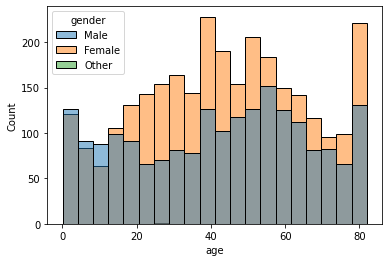

In [204]:
sns.histplot(x= data['age'], hue = data.gender)

<AxesSubplot:xlabel='age'>

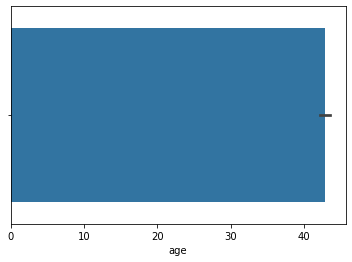

In [202]:
sns.barplot(x= data['age'])